<a href="https://colab.research.google.com/github/Chathurya99/Pose_Fit_FYP/blob/master/Workout_Lunges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workout Classification - Tensorflow



## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Download Data

In [2]:
# Upload first your data before execute these code below
path_workout = "/content/lunges.csv"; # change this
path_other = "/content/other.csv"; # change this
name_class = "Lunges" # change this
# change resolution if you using video with different resolution
resolution = {
    "width": 640,
    "height": 360
}

In [3]:
df_workout = pd.read_csv(path_workout)
df_other = pd.read_csv(path_other)

In [4]:
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,326.087238,94.985189,328.488163,84.693997,329.868179,84.833932,349.747403,82.228740,349.838809,81.163685,...,382.176943,232.997018,423.373641,326.239805,310.503853,269.783093,517.900648,358.080220,343.465027,359.587077
1,317.753943,80.036763,322.689231,71.380134,322.775080,71.531580,343.880665,70.942277,342.199147,70.378175,...,379.319694,225.087023,409.494613,315.100640,311.454204,270.050595,501.454115,349.633162,341.921202,359.400980
2,311.577333,70.244053,315.338379,61.100089,315.336071,61.869705,337.352951,60.222693,335.213147,60.053977,...,377.089378,217.392613,394.336717,301.575812,313.169678,269.041342,481.332523,345.727945,338.648114,360.716624
3,313.304920,73.324159,316.495263,63.567280,315.851173,63.895959,337.147053,60.378927,334.343192,59.968693,...,372.707312,215.132888,394.828058,297.658084,313.520571,269.234092,479.518709,346.067006,336.858899,358.424739
4,308.298926,63.066898,311.715799,53.050476,311.594377,54.290980,333.143631,50.464208,330.317209,50.725013,...,373.112411,206.240085,383.394281,285.910606,320.898770,266.640778,461.660630,346.536104,337.127148,359.964239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,277.024563,124.484434,281.146101,115.481300,281.225384,115.586707,300.908940,110.304918,300.320458,110.541442,...,345.441419,253.941469,396.650321,349.187779,279.980686,306.607694,489.347215,371.657354,315.191117,392.114863
504,278.273540,131.646574,282.390140,121.958879,282.720724,122.209394,303.287133,118.760270,302.383559,117.788796,...,345.680030,261.500608,402.790483,353.849321,273.709935,304.760353,495.958505,378.498348,315.652773,391.484717
505,278.803870,139.682425,284.116126,130.671655,283.834575,130.656377,303.713386,127.954468,303.110222,126.862527,...,348.370224,269.353232,408.816059,360.620247,270.557560,306.384599,500.346891,381.905910,314.080403,386.571386
506,281.206969,140.194203,283.731472,129.942583,284.140040,130.265491,304.278833,127.923283,303.552249,127.602045,...,348.917692,268.714464,409.007894,360.360359,272.141759,303.498503,501.046449,381.938818,313.667046,387.038046


In [5]:
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,0.000614,0.001060,0.000639,0.001009,0.000586,0.001015,0.000678,0.001043,0.000560,0.001058,...,0.000522,0.001964,0.000711,0.002210,0.000513,0.002304,0.000732,0.002167,0.000500,0.002193
1,0.000606,0.001067,0.000632,0.001020,0.000575,0.001026,0.000674,0.001053,0.000550,0.001069,...,0.000500,0.002013,0.000716,0.002170,0.000489,0.002188,0.000729,0.002162,0.000503,0.002153
2,0.000596,0.001075,0.000622,0.001018,0.000569,0.001037,0.000667,0.001046,0.000542,0.001083,...,0.000487,0.001985,0.000706,0.002133,0.000483,0.002168,0.000715,0.002152,0.000629,0.001280
3,0.000589,0.001089,0.000620,0.001025,0.000565,0.001044,0.000662,0.001049,0.000536,0.001086,...,0.000491,0.001978,0.000702,0.002126,0.000482,0.002155,0.000712,0.002129,0.000659,0.001178
4,0.000583,0.001088,0.000611,0.001031,0.000559,0.001054,0.000652,0.001045,0.000536,0.001076,...,0.000487,0.001959,0.000685,0.002158,0.000476,0.002171,0.000700,0.002162,0.000654,0.001117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.000132,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151
534,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.000136,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206
535,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.000091,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196
536,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.000081,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777


**Important**: Check first, the number of data each class is balance or not.

## Data Understanding

TODO: Coming Soon

## Data Exploration

TODO: Coming Soon

## Data Preparation

In [6]:
df_workout["class"] = name_class
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,326.087238,94.985189,328.488163,84.693997,329.868179,84.833932,349.747403,82.228740,349.838809,81.163685,...,232.997018,423.373641,326.239805,310.503853,269.783093,517.900648,358.080220,343.465027,359.587077,Lunges
1,317.753943,80.036763,322.689231,71.380134,322.775080,71.531580,343.880665,70.942277,342.199147,70.378175,...,225.087023,409.494613,315.100640,311.454204,270.050595,501.454115,349.633162,341.921202,359.400980,Lunges
2,311.577333,70.244053,315.338379,61.100089,315.336071,61.869705,337.352951,60.222693,335.213147,60.053977,...,217.392613,394.336717,301.575812,313.169678,269.041342,481.332523,345.727945,338.648114,360.716624,Lunges
3,313.304920,73.324159,316.495263,63.567280,315.851173,63.895959,337.147053,60.378927,334.343192,59.968693,...,215.132888,394.828058,297.658084,313.520571,269.234092,479.518709,346.067006,336.858899,358.424739,Lunges
4,308.298926,63.066898,311.715799,53.050476,311.594377,54.290980,333.143631,50.464208,330.317209,50.725013,...,206.240085,383.394281,285.910606,320.898770,266.640778,461.660630,346.536104,337.127148,359.964239,Lunges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,277.024563,124.484434,281.146101,115.481300,281.225384,115.586707,300.908940,110.304918,300.320458,110.541442,...,253.941469,396.650321,349.187779,279.980686,306.607694,489.347215,371.657354,315.191117,392.114863,Lunges
504,278.273540,131.646574,282.390140,121.958879,282.720724,122.209394,303.287133,118.760270,302.383559,117.788796,...,261.500608,402.790483,353.849321,273.709935,304.760353,495.958505,378.498348,315.652773,391.484717,Lunges
505,278.803870,139.682425,284.116126,130.671655,283.834575,130.656377,303.713386,127.954468,303.110222,126.862527,...,269.353232,408.816059,360.620247,270.557560,306.384599,500.346891,381.905910,314.080403,386.571386,Lunges
506,281.206969,140.194203,283.731472,129.942583,284.140040,130.265491,304.278833,127.923283,303.552249,127.602045,...,268.714464,409.007894,360.360359,272.141759,303.498503,501.046449,381.938818,313.667046,387.038046,Lunges


In [7]:
df_workout = df_workout[:1415]
df_workout

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,326.087238,94.985189,328.488163,84.693997,329.868179,84.833932,349.747403,82.228740,349.838809,81.163685,...,232.997018,423.373641,326.239805,310.503853,269.783093,517.900648,358.080220,343.465027,359.587077,Lunges
1,317.753943,80.036763,322.689231,71.380134,322.775080,71.531580,343.880665,70.942277,342.199147,70.378175,...,225.087023,409.494613,315.100640,311.454204,270.050595,501.454115,349.633162,341.921202,359.400980,Lunges
2,311.577333,70.244053,315.338379,61.100089,315.336071,61.869705,337.352951,60.222693,335.213147,60.053977,...,217.392613,394.336717,301.575812,313.169678,269.041342,481.332523,345.727945,338.648114,360.716624,Lunges
3,313.304920,73.324159,316.495263,63.567280,315.851173,63.895959,337.147053,60.378927,334.343192,59.968693,...,215.132888,394.828058,297.658084,313.520571,269.234092,479.518709,346.067006,336.858899,358.424739,Lunges
4,308.298926,63.066898,311.715799,53.050476,311.594377,54.290980,333.143631,50.464208,330.317209,50.725013,...,206.240085,383.394281,285.910606,320.898770,266.640778,461.660630,346.536104,337.127148,359.964239,Lunges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,277.024563,124.484434,281.146101,115.481300,281.225384,115.586707,300.908940,110.304918,300.320458,110.541442,...,253.941469,396.650321,349.187779,279.980686,306.607694,489.347215,371.657354,315.191117,392.114863,Lunges
504,278.273540,131.646574,282.390140,121.958879,282.720724,122.209394,303.287133,118.760270,302.383559,117.788796,...,261.500608,402.790483,353.849321,273.709935,304.760353,495.958505,378.498348,315.652773,391.484717,Lunges
505,278.803870,139.682425,284.116126,130.671655,283.834575,130.656377,303.713386,127.954468,303.110222,126.862527,...,269.353232,408.816059,360.620247,270.557560,306.384599,500.346891,381.905910,314.080403,386.571386,Lunges
506,281.206969,140.194203,283.731472,129.942583,284.140040,130.265491,304.278833,127.923283,303.552249,127.602045,...,268.714464,409.007894,360.360359,272.141759,303.498503,501.046449,381.938818,313.667046,387.038046,Lunges


In [8]:
df_other["class"] = "other"
df_other

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,0.000614,0.001060,0.000639,0.001009,0.000586,0.001015,0.000678,0.001043,0.000560,0.001058,...,0.001964,0.000711,0.002210,0.000513,0.002304,0.000732,0.002167,0.000500,0.002193,other
1,0.000606,0.001067,0.000632,0.001020,0.000575,0.001026,0.000674,0.001053,0.000550,0.001069,...,0.002013,0.000716,0.002170,0.000489,0.002188,0.000729,0.002162,0.000503,0.002153,other
2,0.000596,0.001075,0.000622,0.001018,0.000569,0.001037,0.000667,0.001046,0.000542,0.001083,...,0.001985,0.000706,0.002133,0.000483,0.002168,0.000715,0.002152,0.000629,0.001280,other
3,0.000589,0.001089,0.000620,0.001025,0.000565,0.001044,0.000662,0.001049,0.000536,0.001086,...,0.001978,0.000702,0.002126,0.000482,0.002155,0.000712,0.002129,0.000659,0.001178,other
4,0.000583,0.001088,0.000611,0.001031,0.000559,0.001054,0.000652,0.001045,0.000536,0.001076,...,0.001959,0.000685,0.002158,0.000476,0.002171,0.000700,0.002162,0.000654,0.001117,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151,other
534,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206,other
535,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196,other
536,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777,other


In [9]:
# Combine fist before split dataset
df_data = pd.concat([df_workout, df_other], ignore_index=True, sort=False)
df_data

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y,class
0,326.087238,94.985189,328.488163,84.693997,329.868179,84.833932,349.747403,82.228740,349.838809,81.163685,...,232.997018,423.373641,326.239805,310.503853,269.783093,517.900648,358.080220,343.465027,359.587077,Lunges
1,317.753943,80.036763,322.689231,71.380134,322.775080,71.531580,343.880665,70.942277,342.199147,70.378175,...,225.087023,409.494613,315.100640,311.454204,270.050595,501.454115,349.633162,341.921202,359.400980,Lunges
2,311.577333,70.244053,315.338379,61.100089,315.336071,61.869705,337.352951,60.222693,335.213147,60.053977,...,217.392613,394.336717,301.575812,313.169678,269.041342,481.332523,345.727945,338.648114,360.716624,Lunges
3,313.304920,73.324159,316.495263,63.567280,315.851173,63.895959,337.147053,60.378927,334.343192,59.968693,...,215.132888,394.828058,297.658084,313.520571,269.234092,479.518709,346.067006,336.858899,358.424739,Lunges
4,308.298926,63.066898,311.715799,53.050476,311.594377,54.290980,333.143631,50.464208,330.317209,50.725013,...,206.240085,383.394281,285.910606,320.898770,266.640778,461.660630,346.536104,337.127148,359.964239,Lunges
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151,other
1042,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206,other
1043,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196,other
1044,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777,other


In [10]:
X = df_data.drop(['class'], axis=1)
y = df_data['class']

In [11]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,326.087238,94.985189,328.488163,84.693997,329.868179,84.833932,349.747403,82.228740,349.838809,81.163685,...,382.176943,232.997018,423.373641,326.239805,310.503853,269.783093,517.900648,358.080220,343.465027,359.587077
1,317.753943,80.036763,322.689231,71.380134,322.775080,71.531580,343.880665,70.942277,342.199147,70.378175,...,379.319694,225.087023,409.494613,315.100640,311.454204,270.050595,501.454115,349.633162,341.921202,359.400980
2,311.577333,70.244053,315.338379,61.100089,315.336071,61.869705,337.352951,60.222693,335.213147,60.053977,...,377.089378,217.392613,394.336717,301.575812,313.169678,269.041342,481.332523,345.727945,338.648114,360.716624
3,313.304920,73.324159,316.495263,63.567280,315.851173,63.895959,337.147053,60.378927,334.343192,59.968693,...,372.707312,215.132888,394.828058,297.658084,313.520571,269.234092,479.518709,346.067006,336.858899,358.424739
4,308.298926,63.066898,311.715799,53.050476,311.594377,54.290980,333.143631,50.464208,330.317209,50.725013,...,373.112411,206.240085,383.394281,285.910606,320.898770,266.640778,461.660630,346.536104,337.127148,359.964239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,0.000446,0.000922,0.000442,0.000852,0.000426,0.000857,0.000362,0.000847,0.000341,0.000850,...,0.000132,0.002003,0.000311,0.001619,0.000547,0.001900,0.000268,0.002041,0.000367,0.002151
1042,0.000404,0.000932,0.000398,0.000859,0.000381,0.000862,0.000308,0.000853,0.000286,0.000856,...,0.000136,0.002080,0.000241,0.001955,0.000322,0.002171,0.000308,0.002215,0.000316,0.002206
1043,0.000364,0.000952,0.000347,0.000875,0.000348,0.000882,0.000243,0.000867,0.000249,0.000885,...,0.000091,0.002025,0.000148,0.001655,0.000289,0.002011,0.000236,0.002197,0.000244,0.002196
1044,0.000316,0.000976,0.000299,0.000893,0.000303,0.000900,0.000198,0.000889,0.000219,0.000908,...,0.000081,0.002073,0.000100,0.001683,0.000014,0.002205,0.000168,0.002190,0.000041,0.002777


In [12]:
y

,class
0,Lunges
1,Lunges
2,Lunges
3,Lunges
4,Lunges
...,...
1041,other
1042,other
1043,other
1044,other


In [13]:
def norm_by_resolution(df, width, height):
  for col in df.keys():
    axcol = col.split("_")[-1]
    if axcol == "x":
      df[col] = df[col] / width
    if axcol == "y":
      df[col] = df[col] / height

In [14]:
norm_by_resolution(X, resolution["width"], resolution["height"])

In [15]:
X

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,5.095113e-01,0.263848,5.132628e-01,0.235261,5.154190e-01,0.235650,5.464803e-01,0.228413,5.466231e-01,0.225455,...,5.971515e-01,0.647214,6.615213e-01,0.906222,4.851623e-01,0.749397,8.092198e-01,0.994667,5.366641e-01,0.998853
1,4.964905e-01,0.222324,5.042019e-01,0.198278,5.043361e-01,0.198699,5.373135e-01,0.197062,5.346862e-01,0.195495,...,5.926870e-01,0.625242,6.398353e-01,0.875280,4.866472e-01,0.750141,7.835221e-01,0.971203,5.342519e-01,0.998336
2,4.868396e-01,0.195122,4.927162e-01,0.169722,4.927126e-01,0.171860,5.271140e-01,0.167285,5.237705e-01,0.166817,...,5.892022e-01,0.603868,6.161511e-01,0.837711,4.893276e-01,0.747337,7.520821e-01,0.960355,5.291377e-01,1.001991
3,4.895389e-01,0.203678,4.945238e-01,0.176576,4.935175e-01,0.177489,5.267923e-01,0.167719,5.224112e-01,0.166580,...,5.823552e-01,0.597591,6.169188e-01,0.826828,4.898759e-01,0.747872,7.492480e-01,0.961297,5.263420e-01,0.995624
4,4.817171e-01,0.175186,4.870559e-01,0.147362,4.868662e-01,0.150808,5.205369e-01,0.140178,5.161206e-01,0.140903,...,5.829881e-01,0.572889,5.990536e-01,0.794196,5.014043e-01,0.740669,7.213447e-01,0.962600,5.267612e-01,0.999901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,6.970672e-07,0.000003,6.904234e-07,0.000002,6.657641e-07,0.000002,5.651531e-07,0.000002,5.328313e-07,0.000002,...,2.067922e-07,0.000006,4.861906e-07,0.000004,8.541672e-07,0.000005,4.184141e-07,0.000006,5.739297e-07,0.000006
1042,6.305172e-07,0.000003,6.212203e-07,0.000002,5.950141e-07,0.000002,4.815219e-07,0.000002,4.465984e-07,0.000002,...,2.124313e-07,0.000006,3.767109e-07,0.000005,5.032234e-07,0.000006,4.813906e-07,0.000006,4.937547e-07,0.000006
1043,5.688047e-07,0.000003,5.428281e-07,0.000002,5.443047e-07,0.000002,3.795297e-07,0.000002,3.895156e-07,0.000002,...,1.417187e-07,0.000006,2.307734e-07,0.000005,4.515250e-07,0.000006,3.692453e-07,0.000006,3.816281e-07,0.000006
1044,4.939625e-07,0.000003,4.676938e-07,0.000002,4.729922e-07,0.000003,3.092594e-07,0.000002,3.426906e-07,0.000003,...,1.260937e-07,0.000006,1.560938e-07,0.000005,2.187500e-08,0.000006,2.621437e-07,0.000006,6.421875e-08,0.000008


### One Hot Encoding

In [16]:
y = pd.get_dummies(y).values
y

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [False,  True],
       [False,  True]])

### Split Dataset

In [17]:
# Proporsi split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [18]:
print("The number of train data X is:", len(X_train))
print("The number of test data X is:", len(X_test))
print("The number of train data y is :", len(y_train))
print("The number of test daya y is :", len(y_test))
print("The total dataset is :", len(df_data))

The number of train data X is: 836
The number of test data X is: 210
The number of train data y is : 836
The number of test daya y is : 210
The total dataset is : 1046


## Modelling

In [21]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(34,)),  # <-- FIXED HERE
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,882 (19.07 KB)

 Trainable params: 4,882 (19.07 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## Training

In [ ]:
# callback_es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', restore_best_weights=True, patience=20)

In [24]:
history = model.fit(
          X_train,
          y_train,
          validation_data=(X_test, y_test),
          batch_size=64,
          # callbacks=[callback_es],
          epochs=200)

Epoch 1/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.3345 - loss: 0.7329 - val_accuracy: 1.0000 - val_loss: 0.6602
Epoch 2/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8069 - loss: 0.6500 - val_accuracy: 1.0000 - val_loss: 0.5856
Epoch 3/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9461 - loss: 0.5854 - val_accuracy: 1.0000 - val_loss: 0.4956
Epoch 4/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9538 - loss: 0.5206 - val_accuracy: 1.0000 - val_loss: 0.4180
Epoch 5/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9861 - loss: 0.4489 - val_accuracy: 1.0000 - val_loss: 0.3651
Epoch 6/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9690 - loss: 0.4159 - val_accuracy: 1.0000 - val_loss: 0.3369
Epoch 7/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9885 - loss: 0.3959 - val_accuracy: 1.0000 - val_loss: 0.3215
Epoch 8/200
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9907 - loss: 0.3563 - val_accuracy: 1.0000 - 

## Visualization Acc & Loss

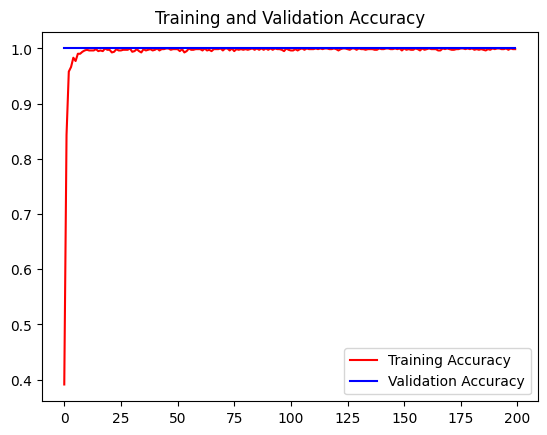

<Figure size 640x480 with 0 Axes>

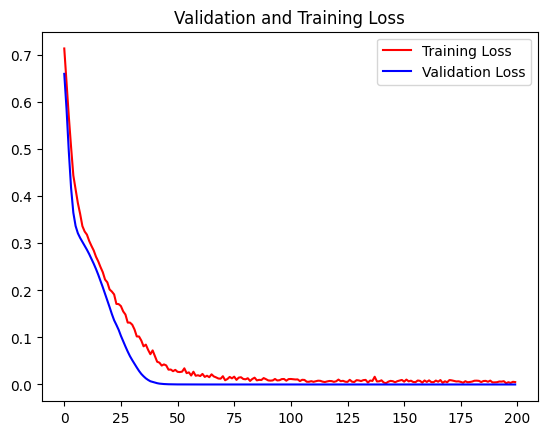

<Figure size 640x480 with 0 Axes>

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Validation and Training Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

## Evaluation

In [26]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 1.8081370073614635e-14
Test accuracy: 1.0


## Test Prediction

In [27]:
x_sample = X_test.sample(1)
x_sample

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
603,0.000002,0.000005,0.000002,0.000005,0.000002,0.000005,0.000002,0.000005,0.000002,0.000005,...,0.000002,0.000006,0.000001,0.000006,0.000002,0.000006,0.000001,0.000006,0.000002,0.000006


In [28]:
x_label_true = df_data.iloc[x_sample.index.values[0]]['class']
print("Actual class is :", x_label_true)

Actual class is : other


In [29]:
df_data['class'].unique()

array(['Lunges', 'other'], dtype=object)

Class and index must order by alphabet:
- other --> Index (0)
- squat --> Index (1)

In [30]:
predict_sample = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


In [31]:
index_class = np.argmax(predict_sample)
print("Predict Class is :")
if index_class == 0:
  print('other')
elif index_class == 1:
  print(name_class)

Predict Class is :
Lunges


## Export Model

In [32]:
# Download this file for backup
model.save("model.h5")

In [33]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.33.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [34]:
!tensorflowjs_converter \
    --input_format=keras \
    /content/model.h5 \
    /content/tfjs_float_model_workout

2025-06-01 12:57:12.990743: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748782633.015650   12979 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748782633.022896   12979 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
failed to lookup keras version from the file,
    this is likely a weight only file


In [35]:
!zip -r /content/tfjs_float_model_workout.zip /content/tfjs_float_model_workout

  adding: content/tfjs_float_model_workout/ (stored 0%)
  adding: content/tfjs_float_model_workout/group1-shard1of1.bin (deflated 8%)
  adding: content/tfjs_float_model_workout/model.json (deflated 82%)


Don't forget to download tfjs model (check relatable folder)